# Renewable.ninja API
from https://www.renewables.ninja/documentation/api/python-example

Limits in requests:
- Chronic max length: 1 year
- Max Request per minute: 6
- Max Request per hour: 50

Since this is generated from Merra weather database at one hour resolution, we will probably not have better resolution than 1 hour.
The available histopry goes back to the year 2000 until now



## Generate 1-year solar chronic at 1 hour resolution given coordinates

### Select solar coordinates

In [1]:
#Path to change
#folium Draw API will save the file in your local Download repository and we will need to retrieve it
import os
import requests
import pandas as pd
import json
YourDownloadPath=os.path.join(os.path.expanduser('~'), 'Downloads')
solarCoordinatesFileName='solarCoordinates.json'
filePath=os.path.join(YourDownloadPath, solarCoordinatesFileName)

In [3]:
# Read prods charac to associate chronics to usecase generators
prods_charac = pd.read_csv('../../../../generation/input/case118_l2rpn_2020/prods_charac.csv', sep = ';')

In [6]:
# Select only solar generators
solar_gen = prods_charac[prods_charac['type']=='solar'].sort_values(by = 'zone')
solar_gen.head(10)

,Pmax,Pmin,name,type,bus,max_ramp_up,max_ramp_down,min_up_time,min_down_time,marginal_cost,shut_down_cost,start_cost,zone,x,y,V
6,55.1,0.0,gen_14_56,solar,14,NaN,NaN,0.0,0.0,0.0,0,0.0,R1,284.0,-159.0,142.1
62,55.1,0.0,gen_10_62,solar,10,NaN,NaN,0.0,0.0,0.0,0,0.0,R1,116.0,-104.0,142.1
21,34.4,0.0,gen_48_57,solar,48,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,772.0,-249.0,142.1
23,34.4,0.0,gen_53_55,solar,53,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,790.0,-48.0,142.1
26,34.4,0.0,gen_55_58,solar,55,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,844.0,-45.0,142.1
28,34.4,0.0,gen_58_54,solar,58,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,950.0,-69.0,142.1
31,34.4,0.0,gen_61_61,solar,61,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,913.0,-311.0,142.1
42,34.4,0.0,gen_79_59,solar,79,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,778.0,-486.0,142.1
63,34.4,0.0,gen_59_63,solar,59,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,950.0,-164.0,142.1
48,137.7,0.0,gen_89_60,solar,89,NaN,NaN,0.0,0.0,0.0,0,0.0,R3,654.0,-685.0,142.1


### Chose locations on map
You should try to simulate the locations in prods_charac (3 regions). Set points in the same order as they appear in prods_charac above

In [ ]:
import folium
from folium.plugins import Draw, MousePosition, MiniMap, LocateControl


m = folium.Map()


if os.path.exists(filePath):
    os.remove(filePath)

draw = Draw(export=True, filename=solarCoordinatesFileName)

draw.add_to(m)

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='topright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m)

minimap = MiniMap()
m.add_child(minimap)

LocateControl(auto_start=True).add_to(m)

m


#### Export your locations with the export button

#### Extract your locations

In [7]:
#read JSON
import geopandas as gpd

gdfSolar = gpd.read_file(filePath)
gdfSolar['longitude']=gdfSolar.geometry.x
gdfSolar['latitude']=gdfSolar.geometry.y


# Add usecase generators
for col in ['name','zone']:
    gdfSolar[col] = solar_gen[col].values

gdfSolar.head()

,geometry,longitude,latitude,name,zone
0,POINT (-96.855469 28.690588),-96.855469,28.690588,gen_14_56,R1
1,POINT (-95.888672 28.825425),-95.888672,28.825425,gen_10_62,R1
2,POINT (-101.865234 30.202114),-101.865234,30.202114,gen_48_57,R2
3,POINT (-102.832031 30.069094),-102.832031,30.069094,gen_53_55,R2
4,POINT (-103.359375 29.649869),-103.359375,29.649869,gen_55_58,R2


### Get your solar chronic from renewable ninja per location and export it per year
So that it is directly interpretable by KPIs

In [8]:
token = '57a51353d6f26d8ad333fad459333bdd402cf19f' # Use your token by subscribing to renewable ninja API
yourOutputPath = "" # Folder to write requested chronics

In [9]:
import requests
import pandas as pd
import json


api_base = 'https://www.renewables.ninja/api/'

s = requests.session()
# Send token header with each request
s.headers = {'Authorization': 'Token ' + token}

##
# PV example
##

url = api_base + 'data/pv'
dfSolarLocation=pd.DataFrame()

In [10]:
year='2017'
import time


sleep_time = 62


s = requests.session()
# Send token header with each request
s.headers = {'Authorization': 'Token ' + token}

dfSolarLocation=pd.DataFrame()


for i, markerIndex in enumerate(range(len(gdfSolar))):
    
    if i == 5:
        time.sleep(sleep_time)
    
    ##
    # PV example
    ##

    #year=SixYears[0]
    latitude=gdfSolar['latitude'][markerIndex]
    longitude=gdfSolar['longitude'][markerIndex]
    name = gdfSolar['name'][markerIndex]
    
    print(name, latitude, longitude)
    
    date_from=year+'-01-01'
    date_to=year+'-12-31'

    args = {
        'lat': latitude,
        'lon': longitude,
        'date_from': date_from,
        'date_to': date_to,
        'dataset': 'merra2',
        'capacity': 1.0,
        'system_loss': 0.1,
        'tracking': 0,
        'tilt': 35,
        'azim': 180,
        'format': 'json'
    }

    r = s.get(url, params=args)
    print(r)

    # Parse JSON to get a pandas.DataFrame of data and dict of metadata
    parsed_response = r.json()

    dataSolarChronic = pd.read_json(json.dumps(parsed_response['data']), orient='index')
    dataSolarChronic.index=pd.to_datetime(dataSolarChronic.index,utc=True) #removing the year to get same index for all years

    dfSolarLocation[name]=dataSolarChronic['electricity']
    
dfSolarLocation.to_csv(os.path.join(yourOutputPath,'test_solar_case118_'+str(year)+'.csv'), sep = ';', index = False)

gen_14_56 28.690588 -96.855469
<Response [200]>
gen_10_62 28.825425 -95.888672
<Response [200]>
gen_48_57 30.202114 -101.865234
<Response [200]>
gen_53_55 30.069094 -102.832031
<Response [200]>
gen_55_58 29.649869 -103.359375
<Response [200]>
gen_58_54 30.183122 -103.996582
<Response [200]>
gen_61_61 30.732393 -103.623047
<Response [200]>
gen_79_59 31.015279 -102.875977
<Response [200]>
gen_59_63 31.297328 -101.799316
<Response [200]>
gen_89_60 30.297018 -98.85498
<Response [200]>


C:\Users\nmegel\Anaconda3\envs\geographic\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


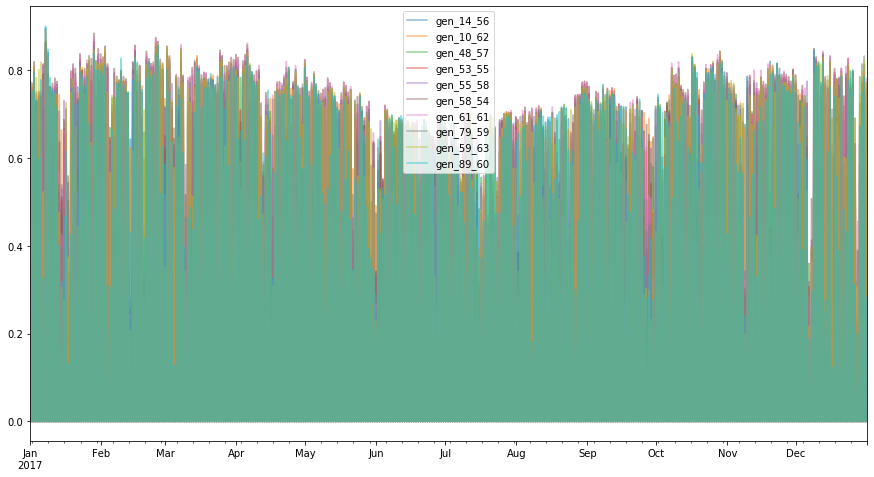

In [8]:
dfSolarLocation.plot(figsize = (15,8), alpha = 0.5)

## Generate 1-year wind chronic at 1 hour resolution given ccordinates

### Select wind coordinates

In [9]:
windCoordinatesFileName='windCoordinates.json'
filePath=os.path.join(YourDownloadPath, windCoordinatesFileName)

In [10]:
# Select only wind generators
wind_gen = prods_charac[prods_charac['type']=='wind'].sort_values(by = 'zone')
wind_gen.head(10)

,Pmax,Pmin,name,type,bus,max_ramp_up,max_ramp_down,min_up_time,min_down_time,marginal_cost,shut_down_cost,start_cost,zone,x,y,V
0,34.4,0.0,gen_3_0,wind,3,NaN,NaN,0.0,0.0,0.0,0,0.0,R1,62.0,-101.0,142.1
11,34.4,0.0,gen_24_10,wind,24,NaN,NaN,0.0,0.0,0.0,0,0.0,R1,315.0,-479.0,142.1
12,34.4,0.0,gen_26_11,wind,26,NaN,NaN,0.0,0.0,0.0,0,0.0,R1,124.0,-425.0,142.1
17,55.1,0.0,gen_39_16,wind,39,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,612.0,-46.0,142.1
20,55.1,0.0,gen_48_19,wind,48,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,772.0,-249.0,142.1
30,55.1,0.0,gen_61_25,wind,61,NaN,NaN,0.0,0.0,0.0,0,0.0,R2,913.0,-311.0,142.1
46,34.4,0.0,gen_88_39,wind,88,NaN,NaN,0.0,0.0,0.0,0,0.0,R3,650.0,-645.0,142.1
52,34.4,0.0,gen_99_44,wind,99,NaN,NaN,0.0,0.0,0.0,0,0.0,R3,851.0,-582.0,142.1
56,34.4,0.0,gen_106_48,wind,106,NaN,NaN,0.0,0.0,0.0,0,0.0,R3,988.0,-582.0,142.1
59,34.4,0.0,gen_111_51,wind,111,NaN,NaN,0.0,0.0,0.0,0,0.0,R3,987.0,-699.0,142.1


In [ ]:
import folium
from folium.plugins import Draw, MousePosition, MiniMap, LocateControl

m = folium.Map()


if os.path.exists(filePath):
    os.remove(filePath)

draw = Draw(export=True, filename=windCoordinatesFileName)

draw.add_to(m)

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='topright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m)

minimap = MiniMap()
m.add_child(minimap)

LocateControl(auto_start=True).add_to(m)

m


#### Export your locations with the export button

#### Extract your locations

In [11]:
#read JSON
import geopandas as gpd
import pandas as pd

gdfWind = gpd.read_file(filePath)
gdfWind['longitude']=gdfWind.geometry.x
gdfWind['latitude']=gdfWind.geometry.y

#O ajoute les colonnes
for col in ['name','zone']:
    gdfWind[col] = wind_gen[col].values

gdfWind.head(10)

,geometry,longitude,latitude,name,zone
0,POINT (-0.6152339999999999 43.389082),-0.615234,43.389082,gen_3_0,R1
1,POINT (-0.439453 44.964798),-0.439453,44.964798,gen_24_10,R1
2,POINT (0.7910160000000001 43.897892),0.791016,43.897892,gen_26_11,R1
3,POINT (6.591797 43.261206),6.591797,43.261206,gen_39_16,R2
4,POINT (5.537109 44.024422),5.537109,44.024422,gen_48_19,R2
5,POINT (4.746094 43.580391),4.746094,43.580391,gen_61_25,R2
6,POINT (2.175293 50.499452),2.175293,50.499452,gen_88_39,R3
7,POINT (2.416992 50.050085),2.416992,50.050085,gen_99_44,R3
8,POINT (1.801758 50.078295),1.801758,50.078295,gen_106_48,R3
9,POINT (2.878418 50.331436),2.878418,50.331436,gen_111_51,R3


### Get wind solar chronic from renewable ninja


#### Select your location in the gdf dataframe


#### Get Chronics from api

In [12]:
token = '57a51353d6f26d8ad333fad459333bdd402cf19f' # Use your token by subscribing to renewable ninja API
yourOutputPath = "" # Folder to write requested chronics

In [13]:
##
# Wind example
##
api_base = 'https://www.renewables.ninja/api/'
url = api_base + 'data/wind'
s = requests.session()
# Send token header with each request
token = '57a51353d6f26d8ad333fad459333bdd402cf19f'
s.headers = {'Authorization': 'Token ' + token}
args = {
    'lat': latitude,
    'lon': longitude,
    'date_from': '2015-01-01',
    'date_to': '2015-12-31',
    'capacity': 1.0,
    'height': 100,
    'turbine': 'Vestas V80 2000',
    'format': 'json'
}

r = s.get(url, params=args)

parsed_response = json.loads(r.text)
dataWind = pd.read_json(json.dumps(parsed_response['data']), orient='index')
metadataWind = parsed_response['metadata']

In [14]:
year='2017'
import time

api_base = 'https://www.renewables.ninja/api/'
url = api_base + 'data/wind'
sleep_time = 62


s = requests.session()
# Send token header with each request
s.headers = {'Authorization': 'Token ' + token}

dfSolarLocation=pd.DataFrame()


for i, markerIndex in enumerate(range(len(gdfWind))):
    
    if i == 5:
        time.sleep(sleep_time)
    
    ##
    # PV example
    ##

    #year=SixYears[0]
    latitude=gdfWind['latitude'][markerIndex]
    longitude=gdfWind['longitude'][markerIndex]
    name = gdfWind['name'][markerIndex]
    
    print(name, latitude, longitude)
    
    date_from=year+'-01-01'
    date_to=year+'-12-31'

    args = {
        'lat': latitude,
        'lon': longitude,
        'date_from': date_from,
        'date_to': date_to,
        'capacity': 1.0,
        'height': 100,
        'turbine': 'Vestas V80 2000',
        'format': 'json'
    }

    r = s.get(url, params=args)
    print(r)

    # Parse JSON to get a pandas.DataFrame of data and dict of metadata
    parsed_response = r.json()

    dataSolarChronic = pd.read_json(json.dumps(parsed_response['data']), orient='index')
    dataSolarChronic.index=pd.to_datetime(dataSolarChronic.index,utc=True) #removing the year to get same index for all years

    dfSolarLocation[name]=dataSolarChronic['electricity']

dfSolarLocation.to_csv(os.path.join(yourOutputPath,'wind_case118_'+str(year)+'.csv'), sep = ';', index = False)

gen_3_0 43.389082 -0.615234
<Response [200]>
gen_24_10 44.964798 -0.439453
<Response [200]>
gen_26_11 43.897892 0.791016
<Response [200]>
gen_39_16 43.261206 6.591797
<Response [200]>
gen_48_19 44.024422 5.537109
<Response [200]>
gen_61_25 43.580391 4.746094
<Response [200]>
gen_88_39 50.499452 2.175293
<Response [200]>
gen_99_44 50.050085 2.416992
<Response [200]>
gen_106_48 50.078295 1.801758
<Response [429]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
dfSolarLocation.plot(figsize = (15,8), alpha = 0.5)